# Libraries

In [41]:
# install.packages('ElemStatLearn')

Installing package into ‘/home/ggomarr/R/x86_64-pc-linux-gnu-library/3.3’
(as ‘lib’ is unspecified)


In [42]:
library(caTools)
library(ggplot2)
library(repr)
options(repr.plot.width=4, repr.plot.height=4)
library(ElemStatLearn)

# Read data

In [11]:
root_dir="~/Documents/Education/20170623 Udemy - Machine Learning A-Z: Hands-On Python and R in Data Science/"
work_dir="Course data/Part 3 - Classification/Section 14 - Logistic Regression"
setwd(paste(root_dir,work_dir,sep=''))
df=read.csv('Social_Network_Ads.csv')[c('Gender','Age','EstimatedSalary','Purchased')]
str(df)

'data.frame':	400 obs. of  4 variables:
 $ Gender         : Factor w/ 2 levels "Female","Male": 2 2 1 1 2 2 1 1 2 1 ...
 $ Age            : int  19 35 26 27 19 27 27 32 25 35 ...
 $ EstimatedSalary: int  19000 20000 43000 57000 76000 58000 84000 150000 33000 65000 ...
 $ Purchased      : int  0 0 0 0 0 0 0 1 0 0 ...


# Categorize

In [13]:
df$Gender=factor(df$Gender)
str(df)

'data.frame':	400 obs. of  4 variables:
 $ Gender         : Factor w/ 2 levels "Female","Male": 2 2 1 1 2 2 1 1 2 1 ...
 $ Age            : int  19 35 26 27 19 27 27 32 25 35 ...
 $ EstimatedSalary: int  19000 20000 43000 57000 76000 58000 84000 150000 33000 65000 ...
 $ Purchased      : int  0 0 0 0 0 0 0 1 0 0 ...


# Scale

In [14]:
df[,c('Age','EstimatedSalary')]=scale(df[,c('Age','EstimatedSalary')])
str(df)

'data.frame':	400 obs. of  4 variables:
 $ Gender         : Factor w/ 2 levels "Female","Male": 2 2 1 1 2 2 1 1 2 1 ...
 $ Age            : num  -1.78 -0.253 -1.112 -1.016 -1.78 ...
 $ EstimatedSalary: num  -1.488 -1.459 -0.784 -0.374 0.184 ...
 $ Purchased      : int  0 0 0 0 0 0 0 1 0 0 ...


# Train/test

In [15]:
set.seed(123)
split=sample.split(df$Purchased, SplitRatio=0.75)
training_set=subset(df,split)
test_set=subset(df,!split)
print(noquote(paste('Training set:',paste(dim(training_set),collapse='x'))))
print(noquote(paste('Test set:',paste(dim(test_set),collapse='x'))))

[1] Training set: 300x4
[1] Test set: 100x4


# Logistic regression model

## Age, Salary and Gender

In [16]:
log_reg=glm(formula=Purchased~.,family=binomial,data=training_set)
summary(log_reg)


Call:
glm(formula = Purchased ~ ., family = binomial, data = training_set)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.0481  -0.5102  -0.1123   0.3135   2.4775  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -1.3555     0.2989  -4.535 5.76e-06 ***
GenderMale        0.2962     0.3623   0.817    0.414    
Age               2.6801     0.3548   7.553 4.25e-14 ***
EstimatedSalary   1.3743     0.2280   6.026 1.68e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 390.89  on 299  degrees of freedom
Residual deviance: 199.11  on 296  degrees of freedom
AIC: 207.11

Number of Fisher Scoring iterations: 6


In [24]:
prob_pred=predict(log_reg,type='response',newdata=test_set)
head(prob_pred)
tail(prob_pred)

2           4           5           9          12          18 
0.023135902 0.010019424 0.003771461 0.003092658 0.006366343 0.279989245

380       383       389       392       395       400 
0.8767513 0.9551288 0.4723392 0.3649128 0.1908331 0.5461225

In [25]:
y_pred=ifelse(prob_pred>0.5,1,0)
head(y_pred)
tail(y_pred)

2  4  5  9 12 18 
 0  0  0  0  0  0

380 383 389 392 395 400 
  1   1   0   0   0   1

In [32]:
table(test_set$Purchased,y_pred)

   y_pred
     0  1
  0 57  7
  1 10 26

## Age and Salary (i.e., without Gender)

In [37]:
log_reg=glm(formula=Purchased~Age+EstimatedSalary,family=binomial,data=training_set)
summary(log_reg)


Call:
glm(formula = Purchased ~ Age + EstimatedSalary, family = binomial, 
    data = training_set)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.0753  -0.5235  -0.1161   0.3224   2.3977  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -1.1799     0.2007  -5.878 4.16e-09 ***
Age               2.6383     0.3469   7.606 2.83e-14 ***
EstimatedSalary   1.3572     0.2264   5.996 2.03e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 390.89  on 299  degrees of freedom
Residual deviance: 199.78  on 297  degrees of freedom
AIC: 205.78

Number of Fisher Scoring iterations: 6


In [38]:
prob_pred=predict(log_reg,type='response',newdata=test_set)
head(prob_pred)
tail(prob_pred)

2           4           5           9          12          18 
0.021287608 0.012508656 0.003590526 0.002937072 0.008006656 0.254920039

380       383       389       392       395       400 
0.8889256 0.9598316 0.4376370 0.3343433 0.2194209 0.5822946

In [39]:
y_pred=ifelse(prob_pred>0.5,1,0)
head(y_pred)
tail(y_pred)

2  4  5  9 12 18 
 0  0  0  0  0  0

380 383 389 392 395 400 
  1   1   0   0   0   1

In [40]:
table(test_set$Purchased,y_pred)

   y_pred
     0  1
  0 57  7
  1 10 26

In [43]:
range_plot_X=function(x,num,ext){
    delta=max(x)-min(x)
    return(seq(min(x)-ext*delta,max(x)+ext*delta,length.out=num))
}

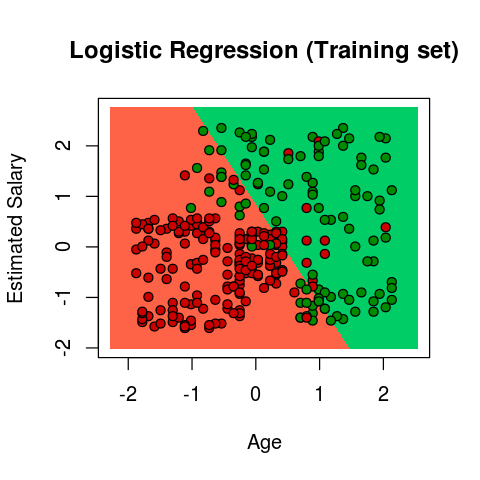

In [48]:
X_plot=range_plot_X(df$Age,1000,0.1)
Y_plot=range_plot_X(df$EstimatedSalary,1000,0.1)
XY_grid=expand.grid(X_plot,Y_plot)
colnames(XY_grid)=c('Age','EstimatedSalary')
prob_pred_grid=predict(log_reg,type='response',newdata=XY_grid)
y_pred_grid=ifelse(prob_pred_grid>0.5,1,0)
plot(df[c('Age','EstimatedSalary')],
     main='Logistic Regression (Training set)',
     xlab='Age',ylab='Estimated Salary',
     xlim=range(X_plot),ylim=range(Y_plot))
contour(X_plot,Y_plot,matrix(as.numeric(y_pred_grid),length(X_plot),length(Y_plot)),add=TRUE)
points(XY_grid,pch='.',col=ifelse(y_pred_grid==1,'springgreen3','tomato'))
points(training_set[c('Age','EstimatedSalary')],pch=21,bg=ifelse(training_set$Purchased==1,'green4','red3'))

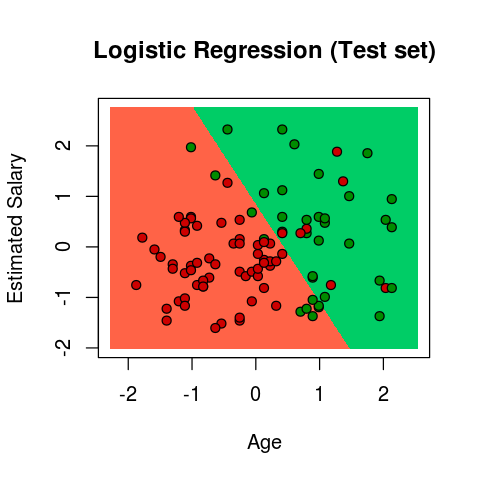

In [49]:
X_plot=range_plot_X(df$Age,1000,0.1)
Y_plot=range_plot_X(df$EstimatedSalary,1000,0.1)
XY_grid=expand.grid(X_plot,Y_plot)
colnames(XY_grid)=c('Age','EstimatedSalary')
prob_pred_grid=predict(log_reg,type='response',newdata=XY_grid)
y_pred_grid=ifelse(prob_pred_grid>0.5,1,0)
plot(df[c('Age','EstimatedSalary')],
     main='Logistic Regression (Test set)',
     xlab='Age',ylab='Estimated Salary',
     xlim=range(X_plot),ylim=range(Y_plot))
contour(X_plot,Y_plot,matrix(as.numeric(y_pred_grid),length(X_plot),length(Y_plot)),add=TRUE)
points(XY_grid,pch='.',col=ifelse(y_pred_grid==1,'springgreen3','tomato'))
points(test_set[c('Age','EstimatedSalary')],pch=21,bg=ifelse(test_set$Purchased==1,'green4','red3'))